# Lab 03 - Linguistic variables

- Professor: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistant 2018: Gary Marigliano (<a href="mailto:gary.marigliano@heig-vd.ch">gary.marigliano@heig-vd.ch</a>)
- Assistant 2019: Diogo Leite (<a href="mailto:diogo.leite@heig-vd.ch">diogo.leite@heig-vd.ch</a>)

Date: Winter 2019

## Instructions:

* Read this notebook
* Do/Answer where **TODO student** is specified
* The folder structure is like this:

```
fuzzy_systems
├── core
└── view
```

* `core` contains core classes like membership_functions, fuzzy_rules,...
* `view` contains classes used to display what the core classes do.
* Please keep this structure when you will do the exercises.


**TODO student** Read and explore the code provided both in this folder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!pygmentize fuzzy_systems/core/linguistic_variables/linguistic_variable.py

from abc import ABCMeta
from abc import ABCMeta
from typing import Dict

from fuzzy_systems.core.membership_functions.free_shape_mf import FreeShapeMF


class LinguisticVariable(metaclass=ABCMeta):
    """
    This class represents a linguistic variable (LV). Basically a LV
    has a name (e.g. "Temperature") and associated linguistic values
    (that basically contains a name (e.g. "Cold") and a membership function
    that represent it).
    """

    def __init__(self, name: str, ling_values_dict: Dict[str, FreeShapeMF]):
        """
        :param name: name of the linguistic variable (e.g. "Temperature")
        :param ling_values_dict: dict that contains the associated linguistic
        values for the linguistic variable. The dict's keys contains the name
        of the linguistic values (e.g. "Cold") and the values contains the
        membership function that represents it (i.e. an instance of
        FreeShapeMF)
        """
        self._name = name
        self._ling_values_

## A basic example

Let's imagine a linguistic variable that represents the stars online customers leave after buying a brand new bed ! From 0 to 10 stars (crisp values) you want to create a fuzzy variable (or linguistic variable) that have 3 labels (or linguistic values) aka "poor", "average" and "good".

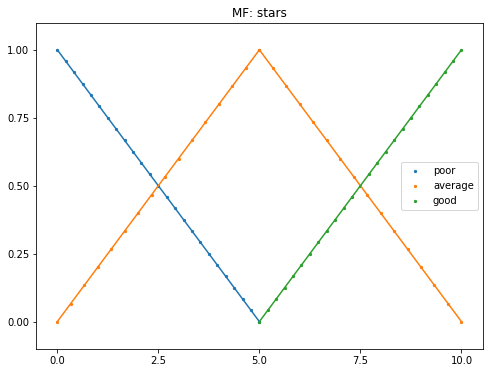

In [3]:
from fuzzy_systems.core.linguistic_variables.linguistic_variable import LinguisticVariable
from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF
from fuzzy_systems.view.lv_viewer import LinguisticVariableViewer

lv_stars = LinguisticVariable(name="stars", ling_values_dict={
        "poor": LinPWMF([0, 1], [5, 0]),
        "average": LinPWMF([0, 0], [5, 1], [10, 0]),
        "good": LinPWMF([5, 0], [10, 1])
    })

LinguisticVariableViewer(lv_stars).show()

**TODO student**

* Copy the code above and create a `lv_stars_modified` linguistic variable. Then, modify the "average" linguistic label from LinPWMF to TrapMF while keeping the same shape.


## A more practical linguistic variable

In the case of a dataset with a lot of variables, we will not create the fancy labels that have a contextual meaning (e.g. "cold", "warm" and "hot" for "Temperature") for each one of them. We prefer to have a more generic but easier way to tag our variables.

Therefore, "cold", "warm" and "hot" become "low", "medium", "high".

We also like to create linguistic variables that share the a similar pre-defined shape like this one:

```
      ^
      | low      medium           high
    1 |XXXXX       X          XXXXXXXXXXXX
      |     X     X  X       XX
      |      X   X    X    XX
      |       X X      XX X
      |       XX        XXX
      |      X  X     XX   XX
      |     X    X XX       XX
      |    X       X          XX
    0 +-------------------------------------->
           p1     p2          p3
```

Note: Later you will see that there are interpretability reasons to keep the number of linguistic labels as low as possible

**TODO student**

* Implement ThreePointsLV and TwoPointsLV classes (you will find the .py files in the lab's folder)
* Remove the `assert`s and start coding 

In [4]:
!pygmentize fuzzy_systems/core/linguistic_variables/three_points_lv.py

from fuzzy_systems.core.linguistic_variables.linguistic_variable import LinguisticVariable
from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF


class ThreePointsLV(LinguisticVariable):
    """
    Syntactic sugar for simplified linguistic variable with only 3 points (p1,
    p2 and p3) and fixed labels ("low", "medium" and "high").


      ^
      | low      medium           high
    1 |XXXXX       X          XXXXXXXXXXXX
      |     X     X  X       XX
      |      X   X    X    XX
      |       X X      XX X
      |       XX        XXX
      |      X  X     XX   XX
      |     X    X XX       XX
      |    X       X          XX
    0 +-------------------------------------->
           p1     p2          p3


    """

    def __init__(self, name, p1, p2, p3):
        ling_values_dict = {
            "low": LinPWMF([p1, 1], [p2, 0]),
            "medium": LinPWMF([p1, 0], [p2, 1], [p3, 0]),
            "high": LinPWMF([p2, 0], [p3, 1])
        }
        args 

In [5]:
!pygmentize fuzzy_systems/core/linguistic_variables/two_points_lv.py

from fuzzy_systems.core.linguistic_variables.linguistic_variable import \
    LinguisticVariable
from fuzzy_systems.core.membership_functions.lin_piece_wise_mf import LinPWMF


class TwoPointsPDLV(LinguisticVariable):
    """
    Syntactic sugar for simplified linguistic variable with only 2 points (p1 and
    p2) and fixed labels ("low", and "high").


      ^
      |
    1 |XXXXXXXXX                 XXXXXXXXXXX
      |        XX               XX
      |         XXX            XX
      |           XXX        XX
      |             XXX    XXX
      |               XX  XX
      |               XXXXX
      |             XXX    XXX
      |          XX           XX
      |        XX              XXX
    0 +------------------------------------>
              P<------ d ------>

    """

    def __init__(self, name, p, d):
        ling_values_dict = {
            "low": LinPWMF([p, 1], [p+d, 0]),
            "high": LinPWMF([p, 0], [p+d, 1])
        }
        args = name, ling_values_dict
  

**TODO student**

* Reproduce the linguistic variables of the resort problem like shown in the following figure
* Show the linguistic variables you just created with `LinguisticVariableViewer` class
* Tip: `LinguisticVariableViewer` accepts an `ax` matplotlib parameter that let you specify where the plot should be rendered. Check the class documentation (it is called a doctring in Python)

``` python 
lv_temperature = LinguisticVariable(....)
lv_sunshine = LinguisticVariable(....)
lv_tourists = LinguisticVariable(....)
```

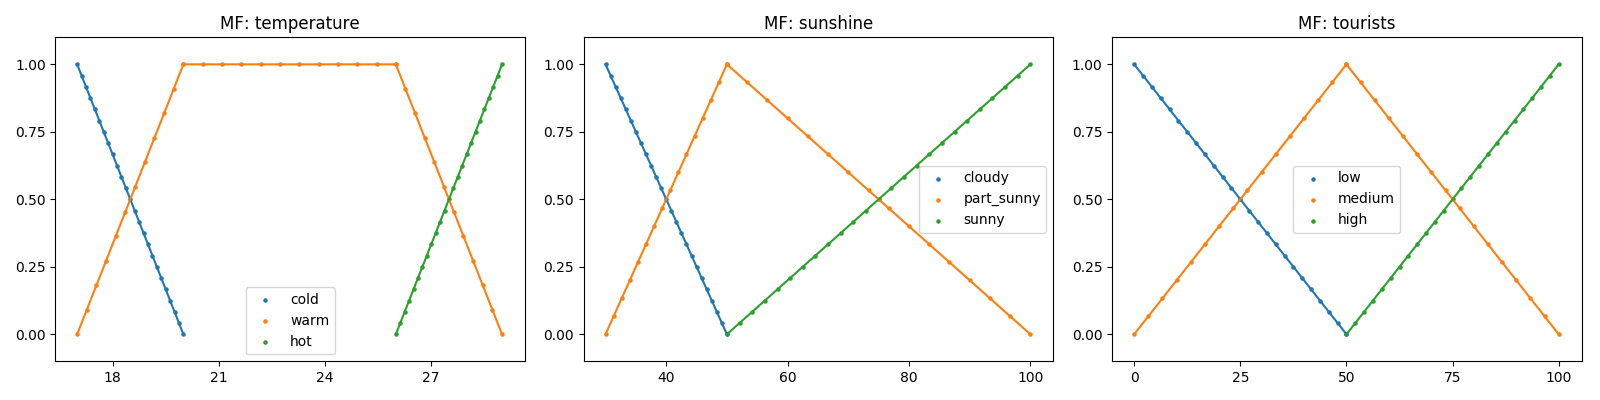

-----------------

# Exercice - please answer below

**TODO student**: 

- Implement what is asked in the right folders
- Write the answer to the questions asked just below. For example:

>In your opinion, what is the meaning of such a function?

blablabla

>Use `MembershipFunctionViewer` to demonstrate how well your implementation works with some relevant test cases/examples.

_add some plots here..._

**TODO student**

> * Copy the code above and create a `lv_stars_modified` linguistic variable. Then, modify the "average" linguistic label from LinPWMF to TrapMF while keeping the same shape.

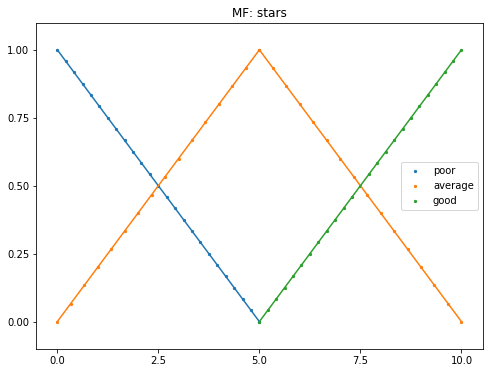

In [6]:
from fuzzy_systems.core.membership_functions.trap_mf import TrapMF

lv_stars_modified = LinguisticVariable(name="stars", ling_values_dict={
        "poor": LinPWMF([0, 1], [5, 0]),
        "average": TrapMF(0, 5, 5, 10),
        "good": LinPWMF([5, 0], [10, 1])
    })

LinguisticVariableViewer(lv_stars).show()

**TODO student**

> * Implement ThreePointsLV and TwoPointsLV classes (you will find the .py files in the lab's folder)
> * Remove the `assert`s and start coding 

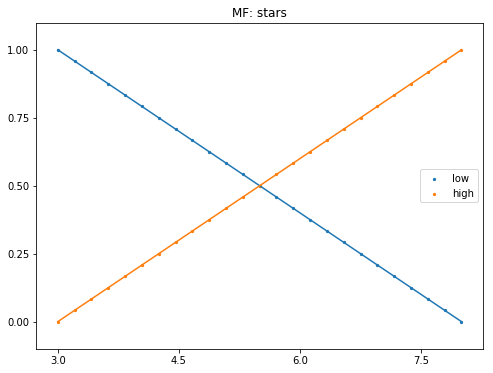

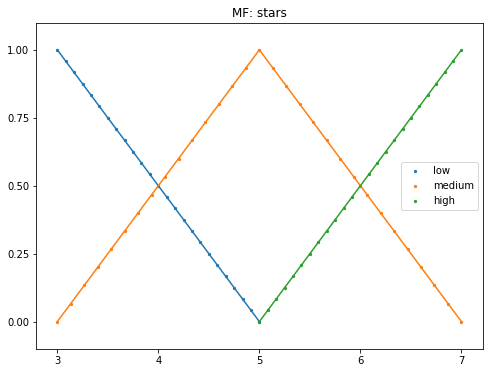

In [7]:
from fuzzy_systems.core.linguistic_variables.two_points_lv import TwoPointsPDLV
from fuzzy_systems.core.linguistic_variables.three_points_lv import ThreePointsLV
from fuzzy_systems.view.lv_viewer import LinguisticVariableViewer

lv_stars = TwoPointsPDLV("stars", 3, 5)
lv_stars_2 = ThreePointsLV("stars", 3, 5, 7)


LinguisticVariableViewer(lv_stars).show()
LinguisticVariableViewer(lv_stars_2).show()

**TODO student**

* Reproduce the linguistic variables of the resort problem like shown in the following figure
* Show the linguistic variables you just created with `LinguisticVariableViewer` class
* Tip: `LinguisticVariableViewer` accepts an `ax` matplotlib parameter that let you specify where the plot should be rendered. Check the class documentation (it is called a doctring in Python)

``` python 
lv_temperature = LinguisticVariable(....)
lv_sunshine = LinguisticVariable(....)
lv_tourists = LinguisticVariable(....)
```

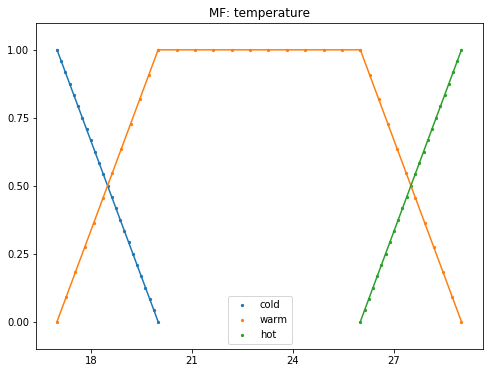

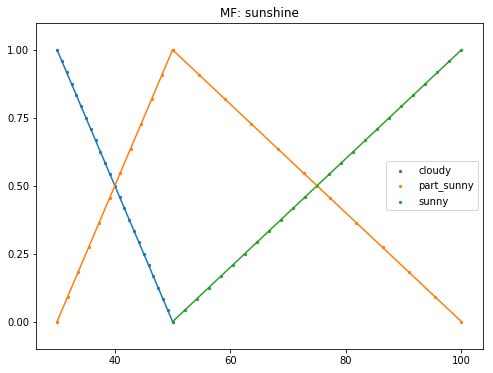

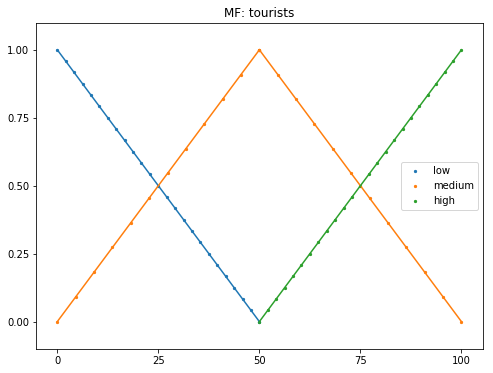

In [18]:
lv_temperature = LinguisticVariable("temperature", {
    "cold": LinPWMF([17, 1], [20, 0]),
    "warm": TrapMF(17, 20, 26, 29),
    "hot": LinPWMF([26, 0], [29, 1])
})

lv_sunshine = LinguisticVariable("sunshine", {
    "cloudy": LinPWMF([30, 1], [50, 0]),
    "part_sunny": TrapMF(30, 50, 50, 100),
    "sunny": LinPWMF([50, 0], [100, 1])
})

lv_tourists = LinguisticVariable("tourists", {
    "low": LinPWMF([0, 1], [50, 0]),
    "medium": TrapMF(0, 50, 50, 100),
    "high": LinPWMF([50, 0], [100, 1])
})

LinguisticVariableViewer(lv_temperature).show()
LinguisticVariableViewer(lv_sunshine).show()
LinguisticVariableViewer(lv_tourists).show()

### To submit

* Please make a zip called `lfa_labXX_YY.zip` where `XX` is the lab number and `YY` is your familly name. For example: `lfa_lab02_smith.zip`. 
* The mail's subject is `[LFA] rendu labXX` where `XX` is the lab number

The zip must contain all _needed_ the files to run this notebook. That is, don't send your virtualenv (only the requirements.txt). **If any additional steps are required to run your notebook(s)/code, please add a README.md where you indicate all the needed steps to reproduce your work.**

Note: Your notebooks must run completely even after the Jupyter kernel has been restarted. To ensure it will be the case when your lab will be reviewed, please select in the top menu "Kernel -> Restart and Run all" and check that the output of each cell is the desired output you want to submit.